In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Turning off sientific notation 
pd.set_option('display.float_format', lambda x: '%.5f' % x)

## Step 1: load and inspect the dataset 

#### The dataset was retrieved on 10/22/2021 using download functionality. It contains information about recently (last 20 years) failed banks, i.e. name of the bank and IDs, date of restructuring and costs, as well as location of headquarters and size of assets and deposits. Source: https://www.fdic.gov/resources/resolutions/bank-failures/failed-bank-list/

In [42]:
df = pd.read_csv('failed_banks.csv')
df.head()

,CERT,CHCLASS1,CITYST,COST,FAILDATE,FIN,ID,NAME,QBFASSET,QBFDEP,RESTYPE,RESTYPE1,SAVR
0,21111,N,"NEWARK, NJ",2491.00000,11/01/2019,10534,4100,CITY NATIONAL BANK OF NEW JERSEY,120574,111234,FAILURE,PA,DIF
1,58112,NM,"LOUISA, KY",4547.00000,10/25/2019,10532,4098,LOUISA COMMUNITY BANK,28163,25174,FAILURE,PA,DIF
2,58317,SB,"MAUMEE, OH",2188.00000,10/25/2019,10533,4099,RESOLUTE BANK,23292,22885,FAILURE,PA,DIF
3,10716,NM,"COOPER, TX",21577.00000,05/31/2019,10531,4097,ENLOE STATE BANK,36738,31254,FAILURE,PI,DIF
4,30570,SB,"CHICAGO, IL",86826.00000,12/15/2017,10530,4096,WASHINGTON FEDERAL BANK FOR SAVINGS,166345,143964,FAILURE,PI,DIF


In [43]:
df.shape

(577, 13)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577 entries, 0 to 576
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CERT      577 non-null    int64  
 1   CHCLASS1  577 non-null    object 
 2   CITYST    577 non-null    object 
 3   COST      563 non-null    float64
 4   FAILDATE  577 non-null    object 
 5   FIN       577 non-null    int64  
 6   ID        577 non-null    int64  
 7   NAME      577 non-null    object 
 8   QBFASSET  577 non-null    int64  
 9   QBFDEP    577 non-null    int64  
 10  RESTYPE   577 non-null    object 
 11  RESTYPE1  577 non-null    object 
 12  SAVR      577 non-null    object 
dtypes: float64(1), int64(5), object(7)
memory usage: 58.7+ KB


## Step 2: drop unused columns

#### These columns will not be used in my analysis and should be dropped from memory:

In [45]:
df.drop(['FIN', 'ID', 'RESTYPE1', 'SAVR' ], axis=1, inplace=True)
df.head()

,CERT,CHCLASS1,CITYST,COST,FAILDATE,NAME,QBFASSET,QBFDEP,RESTYPE
0,21111,N,"NEWARK, NJ",2491.00000,11/01/2019,CITY NATIONAL BANK OF NEW JERSEY,120574,111234,FAILURE
1,58112,NM,"LOUISA, KY",4547.00000,10/25/2019,LOUISA COMMUNITY BANK,28163,25174,FAILURE
2,58317,SB,"MAUMEE, OH",2188.00000,10/25/2019,RESOLUTE BANK,23292,22885,FAILURE
3,10716,NM,"COOPER, TX",21577.00000,05/31/2019,ENLOE STATE BANK,36738,31254,FAILURE
4,30570,SB,"CHICAGO, IL",86826.00000,12/15/2017,WASHINGTON FEDERAL BANK FOR SAVINGS,166345,143964,FAILURE


## Step 3: find and impute missing values

#### Checking if there are any missing data points:

In [46]:
df.isnull().sum().sum()

14

In [47]:
missing_data = df[df.isnull().any(axis=1)]
missing_data

,CERT,CHCLASS1,CITYST,COST,FAILDATE,NAME,QBFASSET,QBFDEP,RESTYPE
505,3510,N,"CHARLOTTE, NC",nan,01/16/2009,BANK OF AMERICA N.A.,1471631047,954677580,ASSISTANCE
507,25178,N,"SAN FRANCISCO, CA",nan,01/16/2009,BANK OF AMERICA CALIFORNIA N.A.,21502223,500,ASSISTANCE
508,27374,NM,"SALT LAKE CITY, UT",nan,01/16/2009,MERRILL LYNCH BANK USA,61809503,53620324,ASSISTANCE
509,33143,SB,"ALEXANDRIA, VA",nan,01/16/2009,COUNTRYWIDE BANK FSB,117978966,43663251,ASSISTANCE
510,33318,N,"WILMINGTON, DE",nan,01/16/2009,FIA CARD SERVICES N.A.,159637136,9816599,ASSISTANCE
511,34571,SB,"NEW YORK, NY",nan,01/16/2009,MERRILL LYNCH BANK & TRUST CO FSB,37986413,28539028,ASSISTANCE
513,35453,N,"PORTLAND, OR",nan,01/16/2009,BANK OF AMERICA OREGON N.A.,11526309,500,ASSISTANCE
514,58032,N,"PROVIDENCE, RI",nan,01/16/2009,BANK OF AMERICA RHODE ISLAND N.A.,35410586,500,ASSISTANCE
518,7213,N,"LAS VEGAS, NV",nan,11/23/2008,"CITIBANK, NATIONAL ASSOCIATION",1207007000,230042000,ASSISTANCE
519,18708,SB,"WILMINGTON, DE",nan,11/23/2008,"CITICORP TRUST BANK, FSB",19599414,7231013,ASSISTANCE


#### It appears that 14 failed banks have `NaN` for restructuring costs. These missing values can be imputed either with zeros, or column average, or, even better, average % of costs to assets, as restructuring a bigger bank is more expensive. Need to check how these missing values related to the type pf resolution, `RESTYPE`. As shown below, there are 2 types - `ASSISTANCE` and `FAILURE`.

In [48]:
df.groupby([df['RESTYPE']]).count()

,CERT,CHCLASS1,CITYST,COST,FAILDATE,NAME,QBFASSET,QBFDEP
RESTYPE,,,,,,,,
ASSISTANCE,13,13,13,0,13,13,13,13
FAILURE,564,564,564,563,564,564,564,564


#### Comparing groupings with missing values. It appears that all 13 `ASSISTANCE` cases have `NaN` for `COST` and thus it is warranted to impute these values with zeros. In other words, assistance is not a failure and there are no direct costs associated with bank's restructuring in this case. There is only one ("NET FIRST NATIONAL BANK") missing value in case of an actual `FAILURE` and it should probably be imputed with some kind of proxy for `COST`.

In [49]:
missing_data.groupby([missing_data['RESTYPE']]).count()

,CERT,CHCLASS1,CITYST,COST,FAILDATE,NAME,QBFASSET,QBFDEP
RESTYPE,,,,,,,,
ASSISTANCE,13,13,13,0,13,13,13,13
FAILURE,1,1,1,0,1,1,1,1


#### Average `COST` of restructuring in case of failure come out to be around 130 million what is probably way too high for small "NET FIRST NATIONAL BANK" (Cert=26652) bank with total assets of only 37 million. 

In [50]:
df.loc[df['RESTYPE']=='FAILURE']['COST'].mean()

130299.83836589698

#### Using relative costs seems warranted in this case - need to compute mean of `COST` / `QBFASSET` and apply it to the bank's assets to estimate possible restructuring costs. The overall average is around 23%.

In [51]:
avg_CostsToAssets  = np.round(np.mean(df['COST']/df['QBFASSET']), 2)
avg_CostsToAssets

0.23

#### Applying this `avg_CostsToAssets` multiplier to the bank's assets produced estimated costs of 8.6 million.

In [52]:
df.iloc[561, ]

CERT                          26652
CHCLASS1                          N
CITYST               BOCA RATON, FL
COST                            NaN
FAILDATE                 03/01/2002
NAME        NET FIRST NATIONAL BANK
QBFASSET                      37207
QBFDEP                        31601
RESTYPE                     FAILURE
Name: 561, dtype: object

#### After the `COST` value was imputed with the multiplier `avg_CostsToAssets`:

In [53]:
df.iloc[561, 3] = df.iloc[561, 6] * avg_CostsToAssets
df.iloc[561, ]

CERT                          26652
CHCLASS1                          N
CITYST               BOCA RATON, FL
COST                     8557.61000
FAILDATE                 03/01/2002
NAME        NET FIRST NATIONAL BANK
QBFASSET                      37207
QBFDEP                        31601
RESTYPE                     FAILURE
Name: 561, dtype: object

#### After this imputation all remaining 13 missing values are associated with assistance `RESTYPE`  and thus should have zero `COST`, i.e. one can impute these missing values with zeros.

In [54]:
df[df.isnull().any(axis=1)].groupby("RESTYPE").count()

,CERT,CHCLASS1,CITYST,COST,FAILDATE,NAME,QBFASSET,QBFDEP
RESTYPE,,,,,,,,
ASSISTANCE,13,13,13,0,13,13,13,13


In [55]:
df['COST'].replace(np.nan, 0, inplace=True)

#### The resulting DataFrame `df` does not have any missing values. 

In [56]:
df.isnull().sum().sum()

0

## Step 4: split location into City and State

#### It turns out that column `CITYST` has valuable information about headquarter's location, namely City and State, separated by column. These data can be split into 2 separate columns to be later used for state-level aggregation.

In [57]:
df.head(2)

,CERT,CHCLASS1,CITYST,COST,FAILDATE,NAME,QBFASSET,QBFDEP,RESTYPE
0,21111,N,"NEWARK, NJ",2491.00000,11/01/2019,CITY NATIONAL BANK OF NEW JERSEY,120574,111234,FAILURE
1,58112,NM,"LOUISA, KY",4547.00000,10/25/2019,LOUISA COMMUNITY BANK,28163,25174,FAILURE


#### Drop the original location column and inspect the resulting DataFrame:

In [58]:
df[['CITY', 'STATE']] = df['CITYST'].str.split(',', expand=True)
df.drop('CITYST', axis=1, inplace=True)
df.head(2)

,CERT,CHCLASS1,COST,FAILDATE,NAME,QBFASSET,QBFDEP,RESTYPE,CITY,STATE
0,21111,N,2491.00000,11/01/2019,CITY NATIONAL BANK OF NEW JERSEY,120574,111234,FAILURE,NEWARK,NJ
1,58112,NM,4547.00000,10/25/2019,LOUISA COMMUNITY BANK,28163,25174,FAILURE,LOUISA,KY


## Step 5: convert and split the date

#### Let's take another look at the resulting DataFrame `df`, what are the types of the remaining columns?

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577 entries, 0 to 576
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CERT      577 non-null    int64  
 1   CHCLASS1  577 non-null    object 
 2   COST      577 non-null    float64
 3   FAILDATE  577 non-null    object 
 4   NAME      577 non-null    object 
 5   QBFASSET  577 non-null    int64  
 6   QBFDEP    577 non-null    int64  
 7   RESTYPE   577 non-null    object 
 8   CITY      577 non-null    object 
 9   STATE     577 non-null    object 
dtypes: float64(1), int64(3), object(6)
memory usage: 45.2+ KB


#### Column `FAILDATE` has information about when the bank has failed, it needs to be converted to `datetime` type and preferably split into for time series analysis.

In [60]:
df['DATE'] = pd.to_datetime(df['FAILDATE'])
df.drop('FAILDATE', axis=1, inplace=True)
df.head(2)

,CERT,CHCLASS1,COST,NAME,QBFASSET,QBFDEP,RESTYPE,CITY,STATE,DATE
0,21111,N,2491.00000,CITY NATIONAL BANK OF NEW JERSEY,120574,111234,FAILURE,NEWARK,NJ,2019-11-01
1,58112,NM,4547.00000,LOUISA COMMUNITY BANK,28163,25174,FAILURE,LOUISA,KY,2019-10-25


#### Split the `DATE` column so that information about the year and month of failure are stored in separate columns. I don't think I will ever need the day of failure, so this information can be ignored.

In [61]:
df['YEAR_FAILED'] = df['DATE'].dt.year.astype('Int64')
df['MONTH_FAILED'] = df['DATE'].dt.month.astype('Int64')
df['QUARTER_FAILED'] = pd.PeriodIndex(df.DATE, freq='Q')
df.drop('DATE', axis=1, inplace=True)
df.head(10)

,CERT,CHCLASS1,COST,NAME,QBFASSET,QBFDEP,RESTYPE,CITY,STATE,YEAR_FAILED,MONTH_FAILED,QUARTER_FAILED
0,21111,N,2491.00000,CITY NATIONAL BANK OF NEW JERSEY,120574,111234,FAILURE,NEWARK,NJ,2019,11,2019Q4
1,58112,NM,4547.00000,LOUISA COMMUNITY BANK,28163,25174,FAILURE,LOUISA,KY,2019,10,2019Q4
2,58317,SB,2188.00000,RESOLUTE BANK,23292,22885,FAILURE,MAUMEE,OH,2019,10,2019Q4
3,10716,NM,21577.00000,ENLOE STATE BANK,36738,31254,FAILURE,COOPER,TX,2019,5,2019Q2
4,30570,SB,86826.00000,WASHINGTON FEDERAL BANK FOR SAVINGS,166345,143964,FAILURE,CHICAGO,IL,2017,12,2017Q4
5,17719,NM,280.00000,THE FARMERS AND MERCHANTS STATE BANK OF ARGONIA,33012,27466,FAILURE,ARGONIA,KS,2017,10,2017Q4
6,1802,SM,8544.00000,FAYETTE COUNTY BANK,34370,33972,FAILURE,SAINT ELMO,IL,2017,5,2017Q2
7,30003,SB,133914.00000,GUARANTY BANK,1031900,1002026,FAILURE,MILWAUKEE,WI,2017,5,2017Q2
8,58302,NM,858100.00000,FIRST NBC BANK,3325870,3032208,FAILURE,NEW ORLEANS,LA,2017,4,2017Q2
9,35495,NM,9302.00000,PROFICIO BANK,68208,65042,FAILURE,COTTONWOOD HEIGHTS,UT,2017,3,2017Q1


## Step 6: mapping bank type to human readable terms

#### Finally, column `CHCLASS1` contains somewhat cryptic values that indicate institution type. 

In [62]:
df['CHCLASS1'].unique()

array(['N', 'NM', 'SB', 'SM', 'SI', 'SA'], dtype=object)

#### They can be mapped to more user friendly human readable terms as explained in the FDIC info page: https://fdicbanksinsured.com/fdic-insured-bank-glossary-of-terms/. In short, FDIC insured banks fall into two types, Commercial or Savings and three classes, based on charter and supervising agency.

In [63]:
fdic_terms = {'N':'Commercial, National FRS Banks', 
              'NM': 'Commercial, State Chartered non-FRS Banks', 
              'SB':'Savings, Federal Savings Bank', 
              'SM':'Commercial, State Chartered FRS Banks', 
              'SI':'Savings, State Savings FDIC Banks', 
              'SA':'Savings, Federal & State Savings and Loans'}

#### Once the mapping is created, values of `CHCLASS1` can be replaced by `fdic_terms` and split on comma to populate two new columns `BANK_TYPE` and `BANK_CLASS`:

In [64]:
df['CHCLASS1'].replace(fdic_terms, inplace=True)
df[['BANK_TYPE', 'BANK_CLASS']] = df['CHCLASS1'].str.split(',', expand=True)
df.drop('CHCLASS1', axis=1, inplace=True)
df.head(2)

,CERT,COST,NAME,QBFASSET,QBFDEP,RESTYPE,CITY,STATE,YEAR_FAILED,MONTH_FAILED,QUARTER_FAILED,BANK_TYPE,BANK_CLASS
0,21111,2491.00000,CITY NATIONAL BANK OF NEW JERSEY,120574,111234,FAILURE,NEWARK,NJ,2019,11,2019Q4,Commercial,National FRS Banks
1,58112,4547.00000,LOUISA COMMUNITY BANK,28163,25174,FAILURE,LOUISA,KY,2019,10,2019Q4,Commercial,State Chartered non-FRS Banks


In [65]:
df.to_csv('failed_banks_cleaned.csv')

## Step 7: visuals

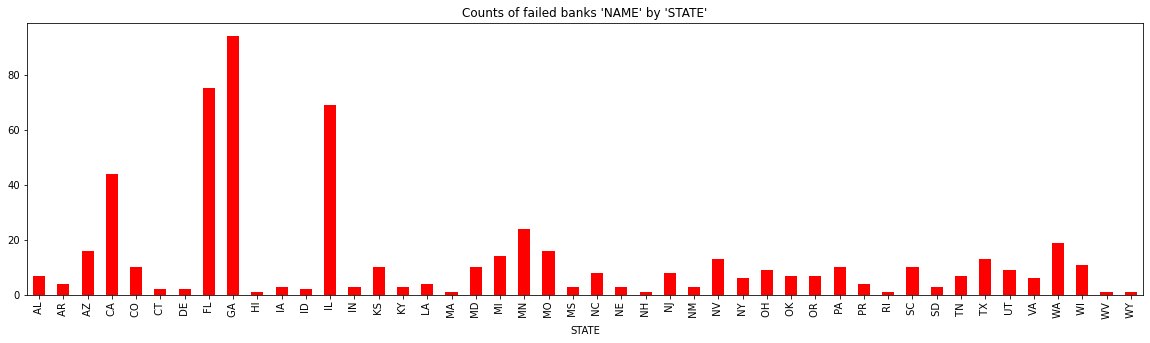

In [66]:
df.groupby(['STATE'])['NAME'].count().plot(kind='bar', 
                                           figsize=(20, 5),
                                           color='red',
                                           title="Counts of failed banks 'NAME' by 'STATE'")
plt.show()

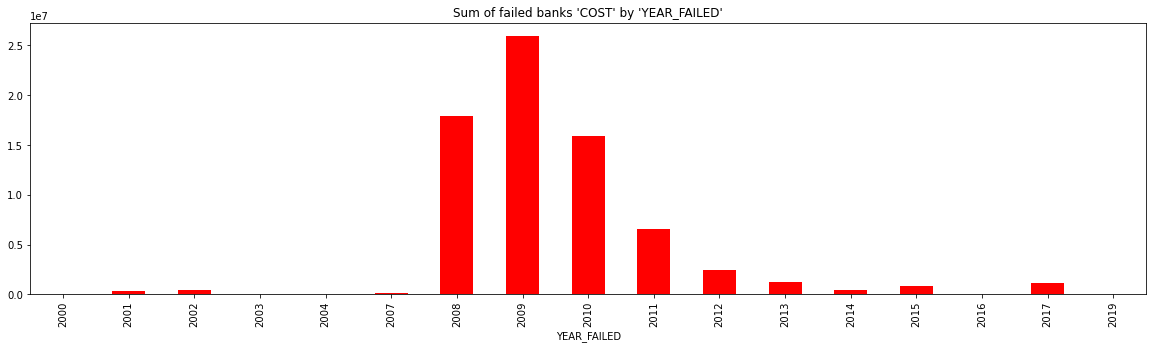

In [68]:
df.groupby(['YEAR_FAILED'])['COST'].sum().plot(kind='bar',
                                               figsize=(20, 5),
                                               color='red',
                                               title="Sum of failed banks 'COST' by 'YEAR_FAILED'")
                                              
plt.show()

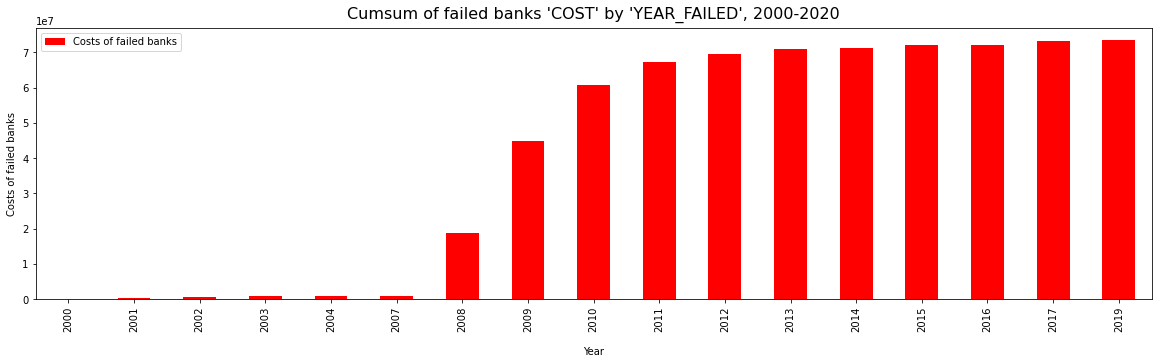

In [69]:
# Same as above, but now calculatate cumulative sum of annual costs of failed banks

# df.apply(lambda x: '%.5f' % x, axis=1)
#df['COST'].round(5)

df.groupby(df['YEAR_FAILED'])['COST'].sum().cumsum(axis=0).round(2).plot(
    kind='bar', color='red', figsize=(20, 5), label="Costs of failed banks")

# Plot appearance management
plt.title("Cumsum of failed banks 'COST' by 'YEAR_FAILED', 2000-2020 ~ 70B+", y=1.01, fontsize=16)
plt.ylabel("Costs of failed banks", labelpad=5)
plt.xlabel("Year", labelpad=15)
plt.legend()
plt.show()

<ipython-input-28-7659222f765f>:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(keys)['QBFASSET','QBFDEP'].sum().plot(kind='barh',


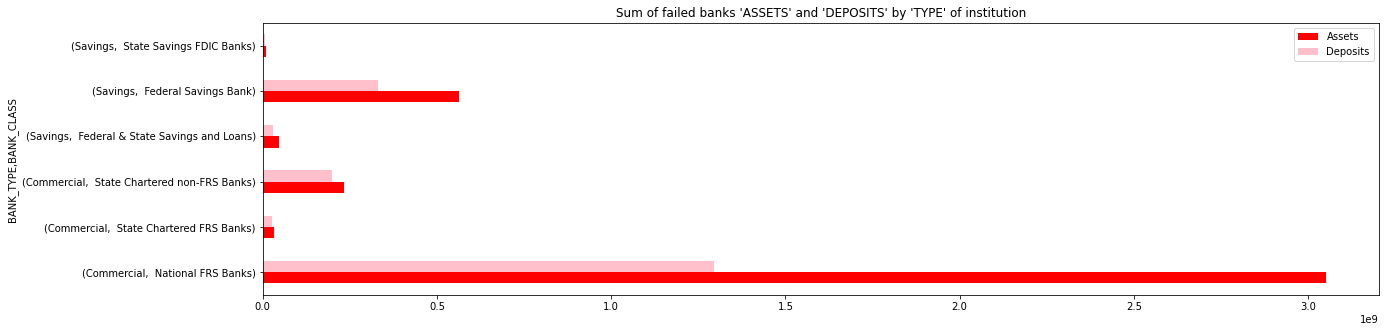

In [28]:
fig, ax = plt.subplots()
title = "Sum of failed banks 'ASSETS' and 'DEPOSITS' by 'TYPE' of institution"
keys = ['BANK_TYPE', 'BANK_CLASS']
df.groupby(keys)['QBFASSET','QBFDEP'].sum().plot(kind='barh',
                                                 figsize=(20, 5),
                                                 title=title,  
                                                 color=('red', 'pink'), 
                                                 ax=ax)

ax.legend({"Assets":"QBFASSET", "Deposits":"QBFDEP"})
                                                         
                                                         
plt.show()

In [29]:
df.groupby(['RESTYPE', 'BANK_TYPE', 'BANK_CLASS'])['COST'].sum()

RESTYPE     BANK_TYPE   BANK_CLASS                        
ASSISTANCE  Commercial   National FRS Banks                          0.00
                         State Chartered non-FRS Banks               0.00
            Savings      Federal Savings Bank                        0.00
FAILURE     Commercial   National FRS Banks                    6768859.61
                         State Chartered FRS Banks             5918281.00
                         State Chartered non-FRS Banks        34959377.00
            Savings      Federal & State Savings and Loans    12480114.00
                         Federal Savings Bank                 11857724.00
                         State Savings FDIC Banks              1383011.00
Name: COST, dtype: float64